In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
stu = pd.read_csv('student_results.csv',index_col =0)

input and test first 5 rows.

In [3]:
stu.head()

,name,phone,sex and age,test number,term 1,term 2,term 3
id,,,,,,,
1,Mike,134,m_12,test 1,76,84,87
2,Linda,270,f_13,test 1,88,90,73
3,Sam,210,m_11,test 1,78,74,80
4,Esther,617,f_12,test 1,68,75,74
5,Mary,114,f_14,test 1,65,67,64


the raw data have sex and ago in same column. the first step need to split this.

In [4]:
stu[['sex','age']] = stu['sex and age'].apply(
   lambda x: pd.Series(str(x).split("_")))
stu

,name,phone,sex and age,test number,term 1,term 2,term 3,sex,age
id,,,,,,,,,
1,Mike,134,m_12,test 1,76,84,87,m,12
2,Linda,270,f_13,test 1,88,90,73,f,13
3,Sam,210,m_11,test 1,78,74,80,m,11
4,Esther,617,f_12,test 1,68,75,74,f,12
5,Mary,114,f_14,test 1,65,67,64,f,14
1,Mike,134,m_12,test 2,85,80,90,m,12
2,Linda,270,f_13,test 2,87,82,94,f,13
3,Sam,210,m_11,test 2,80,87,80,m,11
4,Esther,617,f_12,test 2,70,75,78,f,12


drop original data and rearrange the column.

In [5]:
stu = stu[['name', 'phone', 'sex','age','test number', 'term 1', 'term 2','term 3']]
stu

,name,phone,sex,age,test number,term 1,term 2,term 3
id,,,,,,,,
1,Mike,134,m,12,test 1,76,84,87
2,Linda,270,f,13,test 1,88,90,73
3,Sam,210,m,11,test 1,78,74,80
4,Esther,617,f,12,test 1,68,75,74
5,Mary,114,f,14,test 1,65,67,64
1,Mike,134,m,12,test 2,85,80,90
2,Linda,270,f,13,test 2,87,82,94
3,Sam,210,m,11,test 2,80,87,80
4,Esther,617,f,12,test 2,70,75,78


the data includes two part, one is student information like phone, sex and age. 
seperate the data, drop duplicate information, replace the abbr to make the data easier to understand.
and list the student by age.

In [6]:
stu_info = stu[['name', 'phone', 'sex','age']]
stu_info = stu_info.replace({'m':'Male','f':'Female'})
stu_info.drop_duplicates(['name'], keep='first', inplace=True)
stu_info.sort_values('age')

,name,phone,sex,age
id,,,,
3,Sam,210,Male,11
1,Mike,134,Male,12
4,Esther,617,Female,12
2,Linda,270,Female,13
5,Mary,114,Female,14


Second part is student grading information.
Every student has two test set of results: test 1 and test 2. 
sort by their names, so that we can better to compare between 2 test results.
and add sum for all test sets.

In [7]:
stu_grade = stu[['name', 'test number', 'term 1', 'term 2','term 3']]
stu_grade['sum'] = stu_grade.sum(axis = 1)
stu_grade.sort_index()

<ipython-input-7-9e93e8602607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stu_grade['sum'] = stu_grade.sum(axis = 1)


,name,test number,term 1,term 2,term 3,sum
id,,,,,,
1,Mike,test 1,76,84,87,247
1,Mike,test 2,85,80,90,255
2,Linda,test 1,88,90,73,251
2,Linda,test 2,87,82,94,263
3,Sam,test 1,78,74,80,232
3,Sam,test 2,80,87,80,247
4,Esther,test 1,68,75,74,217
4,Esther,test 2,70,75,78,223
5,Mary,test 1,65,67,64,196


group by their names to get different between second and first test result sum. 
The result shows Sam has the greatest progress.

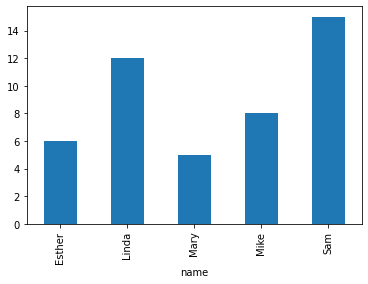

In [8]:
test_diff = stu_grade['sum'].groupby(stu_grade['name']).last() -stu_grade['sum'].groupby(stu_grade['name']).first() 

test_diff.plot(kind = 'bar')

By comparing average of two tests, we can find Linda gets highest grades. 

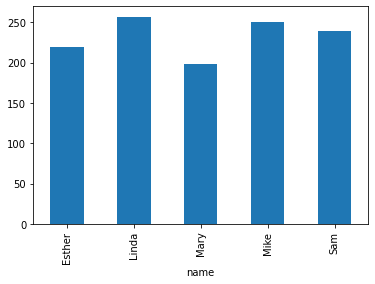

In [9]:
test_mean = stu_grade['sum'].groupby(stu_grade['name']).mean()
test_mean.plot(kind = 'bar')

In [12]:
stu_join = stu_grade.join(stu_info['sex'])

Join sex from student information dataframe to compare overall performance between M and F

In [13]:
stu_join.groupby('sex').sum()

,term 1,term 2,term 3,sum
sex,,,,
Female,446,459,446,1351
Male,319,325,337,981
